# VIA515E IMAGE ANALYSIS - FINAL EXAM

## Hande Şen - 528191030

# Question 1
### 1. Get the red, green and blue channel pixel values of the image file “Efes.JPG”.

In [1]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

from scipy import ndimage
from skimage import data
from skimage.color import rgb2gray
from skimage.io import imread
from skimage.io import imshow
from skimage.util import random_noise

In [2]:
import warnings
warnings.filterwarnings('ignore')

#    a. Convert it to a grayscale image, and name it as Efes_gray.

In [3]:
def rgb2gray(img):

    r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [4]:
# Read
Efes = io.imread("/Users/handesen/Desktop/data_science/Donem2/Image/final/Efes.JPG")

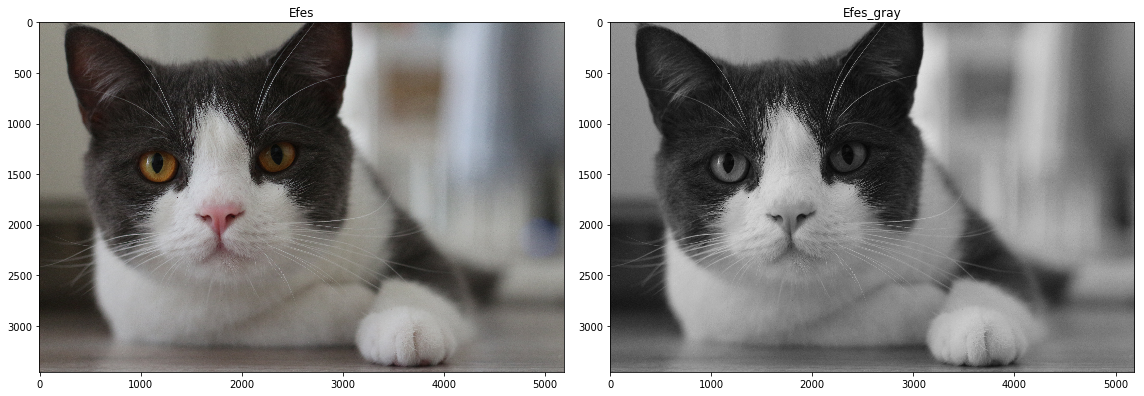

In [5]:
Efes_gray = rgb2gray(Efes)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes.ravel()

ax[0].imshow(Efes.astype("uint8"))
ax[0].set_title("Efes")
ax[1].imshow(Efes_gray, cmap=plt.cm.gray)
ax[1].set_title("Efes_gray")

fig.tight_layout()
plt.show()

#   b. Plot 16, 32 and 64-bin-histograms of Efes_gray.

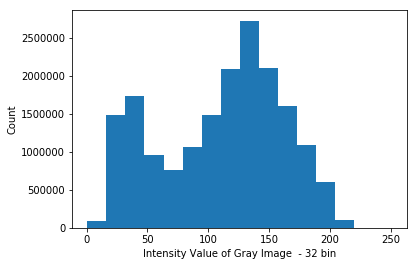

In [6]:
_ = plt.hist(Efes_gray.ravel(), bins = 16 )
_ = plt.xlabel('Intensity Value of Gray Image  - 32 bin')
_ = plt.ylabel('Count')
plt.show()

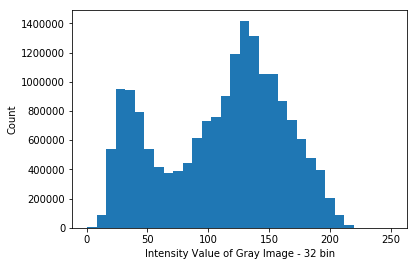

In [7]:
_ = plt.hist(Efes_gray.ravel(), bins = 32 )
_ = plt.xlabel('Intensity Value of Gray Image - 32 bin')
_ = plt.ylabel('Count')
plt.show()

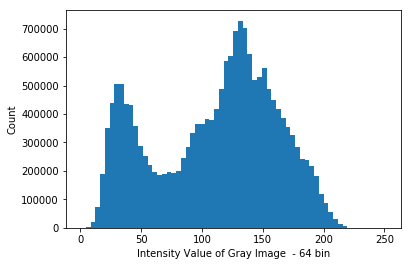

In [8]:
_ = plt.hist(Efes_gray.ravel(), bins = 64 )
_ = plt.xlabel('Intensity Value of Gray Image  - 64 bin')
_ = plt.ylabel('Count')
plt.show()

 #  c. Inspect the histogram and pick a value as a threshold. Obtain a binary image out of Efes_gray using your threshold value and name it as Efes_yourBinary.

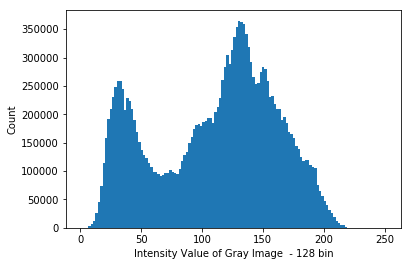

In [9]:
_ = plt.hist(Efes_gray.ravel(), bins = 128 )
_ = plt.xlabel('Intensity Value of Gray Image  - 128 bin')
_ = plt.ylabel('Count')
plt.show()

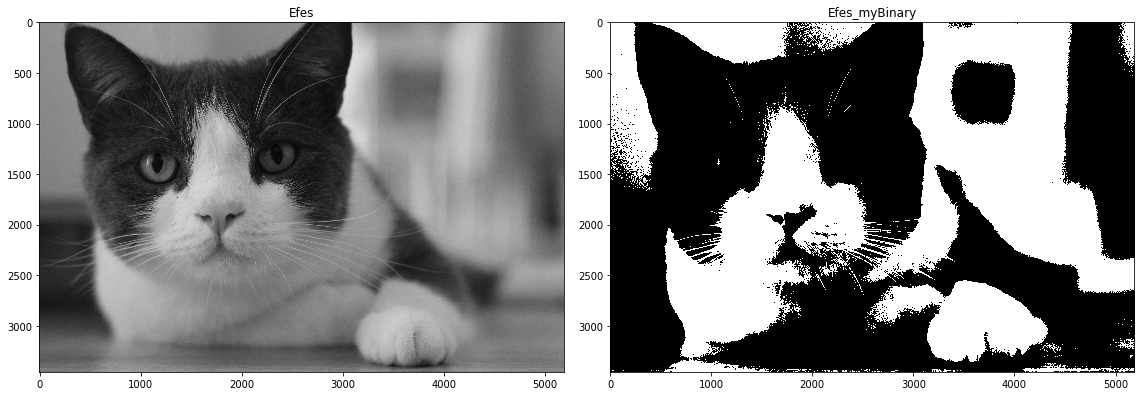

In [10]:
thresh = 130
Efes_myBinary = cv2.threshold(Efes_gray, thresh, 255, cv2.THRESH_BINARY)[1]

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes.ravel()

ax[0].imshow(Efes_gray, cmap=plt.cm.gray)
ax[0].set_title("Efes")
ax[1].imshow(Efes_myBinary, cmap=plt.cm.gray)
ax[1].set_title("Efes_myBinary")

fig.tight_layout()
plt.show()

#    d. Now, obtain a threshold value using Otsu’s algorithm and name that image as Efes_OTSU.

In [11]:
#https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html
def otsuThreshold(img):
    # find normalized_histogram, and its cumulative distribution function
    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    hist_norm = hist.ravel()/hist.max()
    Q = hist_norm.cumsum()

    bins = np.arange(256)

    fn_min = np.inf
    thresh = -1

    for i in range(1,256):
        p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
        q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
        b1,b2 = np.hsplit(bins,[i]) # weights

        # finding means and variances
        m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
        v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2

        # calculates the minimization function
        fn = v1*q1 + v2*q2
        if fn < fn_min:
            fn_min = fn
            thresh = i

    return (thresh)

98


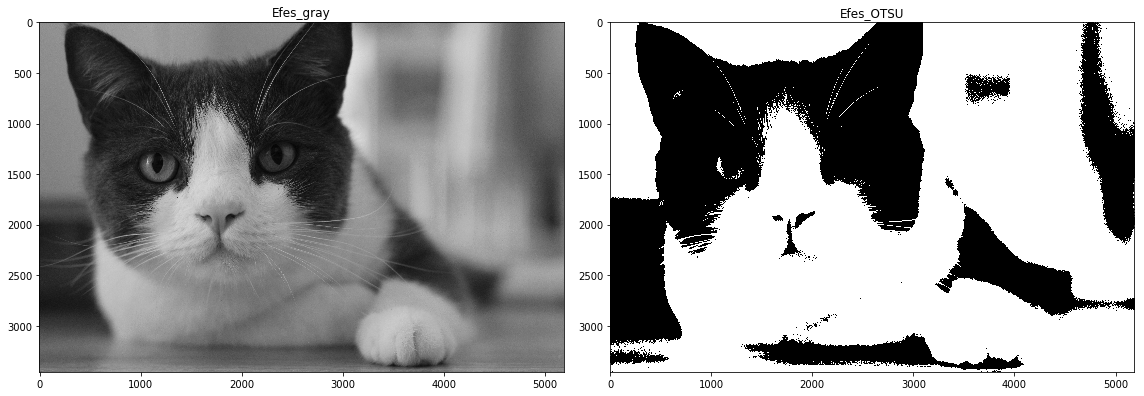

In [12]:
Efes_reload = cv2.imread("/Users/handesen/Desktop/data_science/Donem2/Image/final/Efes.JPG")
Efes_reload = cv2.cvtColor(Efes_reload,cv2.COLOR_BGR2GRAY)
otsu = otsuThreshold(Efes_reload)
print(otsu)
Efes_OTSU = cv2.threshold(Efes_reload, otsu, 255, cv2.THRESH_BINARY)[1]

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes.ravel()

ax[0].imshow(Efes_reload, cmap=plt.cm.gray)
ax[0].set_title("Efes_gray")
ax[1].imshow(Efes_OTSU, cmap=plt.cm.gray)
ax[1].set_title("Efes_OTSU")

fig.tight_layout()
plt.show()

#    e. Compare Efes_myBinary and Efes_OTSU. Comment.

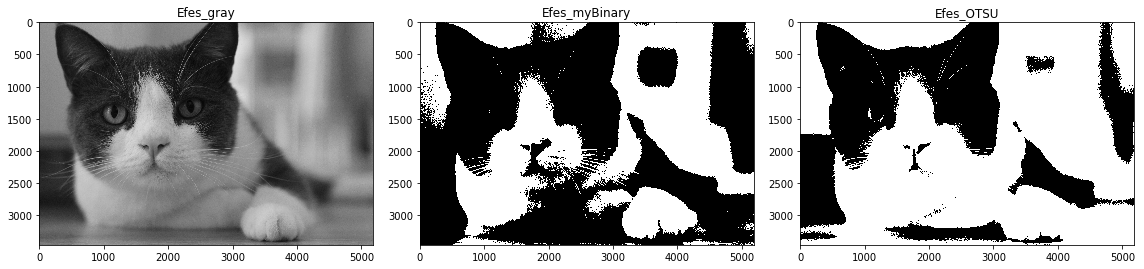

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(16, 8))
ax = axes.ravel()

ax[0].imshow(Efes_gray, cmap=plt.cm.gray)
ax[0].set_title("Efes_gray")
ax[1].imshow(Efes_myBinary, cmap=plt.cm.gray)
ax[1].set_title("Efes_myBinary")
ax[2].imshow(Efes_OTSU, cmap=plt.cm.gray)
ax[2].set_title("Efes_OTSU")

fig.tight_layout()
plt.show()

http://www.labbookpages.co.uk/software/imgProc/otsuThreshold.html

The Otsu method is a threshold detection method that can be applied on gray level images. When using this method, it is assumed that the image consists of two color classes: background and foreground. Then the in-class variance value of these two color classes is calculated for all threshold values. The threshold value that enables this value to be the smallest is the optimum threshold value.

While the variance value in the class is at the minimum value, the variance between the classes is at the maximum. Calculating the variance value between classes requires less processing, while calculating the variance between the classes for the background and foreground pixel classes, while the method is put into the code, provides faster results.

The method works on gray-level images and only looks at how many colors are on the image. Therefore, I applied this method to Efes_gray image.

My threshhold is just picking a number from 128-bin histogram manuel.I choose the most frequent color code for threshold. So, my image has more noise comparing to otsu image. Otsu calculates Weight-Background, Variance-Background, Variance-Background, Weight-Foreground, Variance-Foreground, Variance-Foreground, Within Class Variance for each threshold at histogram and picked the smallest Within Class Variance. For this reason otsu image is more smooth.

#    f. Propose and develop method(s) to locate the “eyes” and “nose” of the cat.

### My first aim is to highlight different colours using HSV transformation. I just tried to apply low pass filters and hsv image

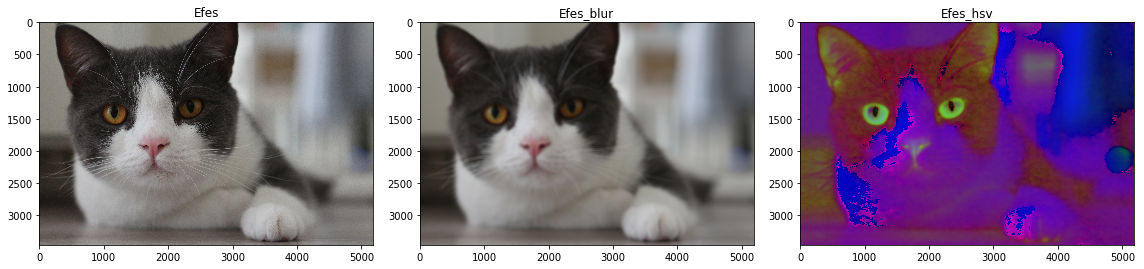

In [14]:
Efes_blur = cv2.blur(Efes,(50,50),cv2.BORDER_DEFAULT) 
Efes_hsv = cv2.cvtColor(Efes_blur, cv2.COLOR_BGR2HSV)

fig, axes = plt.subplots(1, 3, figsize=(16, 8))
ax = axes.ravel()

ax[0].imshow(Efes.astype("uint8"))
ax[0].set_title("Efes")
ax[1].imshow(Efes_blur, cmap=plt.cm.gray)
ax[1].set_title("Efes_blur")
ax[2].imshow(Efes_hsv, cmap=plt.cm.gray)
ax[2].set_title("Efes_hsv")

fig.tight_layout()
plt.show()

In [15]:
def apply_low_pass_filter(img,kernel_size):

    kernel3 = [[1 / 9, 1 / 9, 1 / 9],
               [1 / 9, 1 / 9, 1 / 9],
               [1 / 9, 1 / 9, 1 / 9]]
    
    kernel5 = [[1 / 25, 1 / 25, 1 / 25, 1 / 25, 1 / 25],
               [1 / 25, 1 / 25, 1 / 25, 1 / 25, 1 / 25],
               [1 / 25, 1 / 25, 1 / 25, 1 / 25, 1 / 25],
               [1 / 25, 1 / 25, 1 / 25, 1 / 25, 1 / 25],
               [1 / 25, 1 / 25, 1 / 25, 1 / 25, 1 / 25]]
    
    if kernel_size==3:
        kernel = kernel3
    else:
        kernel = kernel5

    img_low = ndimage.convolve(img, kernel)

    return img_low

In [16]:
def apply_high_pass_filter(img,kernel_size):

    kernel8 = [[-1, -1, -1],
              [-1, 8 , -1],
              [-1, -1, -1]]
      
    kernel17 = [[0.17, 0.67, 0.17],
               [0.67, -3.33 , 0.67],
               [0.17, 0.67, 0.17]]
    
        
    if kernel_size==8:
        kernel = kernel8
    else:
        kernel = kernel17

    img_high = ndimage.convolve(img, kernel)

    return img_high

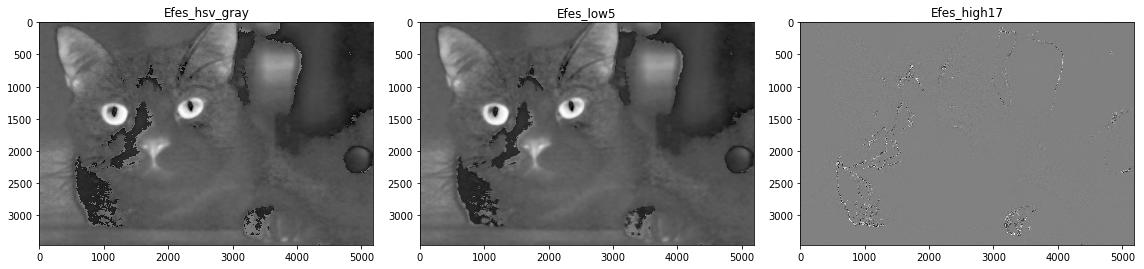

In [17]:
Efes_hsv_gray = rgb2gray(Efes_hsv)
I_1_high8 = apply_low_pass_filter(Efes_hsv_gray, 5)
I_1_high17 = apply_high_pass_filter(Efes_hsv_gray, 17)

fig, axes = plt.subplots(1, 3, figsize=(16, 8))
ax = axes.ravel()

ax[0].imshow(Efes_hsv_gray, cmap=plt.cm.gray)
ax[0].set_title("Efes_hsv_gray")
ax[1].imshow(I_1_high8, cmap=plt.cm.gray)
ax[1].set_title("Efes_low5")
ax[2].imshow(I_1_high17, cmap=plt.cm.gray)
ax[2].set_title("Efes_high17")

fig.tight_layout()
plt.show()

### My second try is to seperate the image YIQ and use the Q part of the image

In [18]:
def rgb2YIQ(img):
    
    r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
    y = 0.299 * r + 0.587 * g + 0.114 * b
    i = 0.596 * r - 0.274 * g + 0.322 * b
    q = 0.211 * r - 0.523 * g + 0.312 * b

    return (y,i,q)

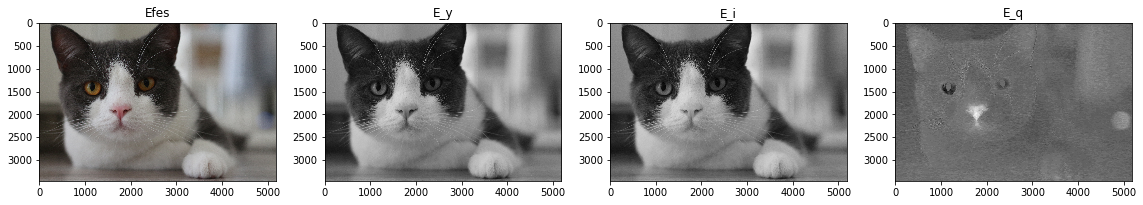

In [19]:
E_y,E_i,E_q = rgb2YIQ(Efes)

fig, axes = plt.subplots(1, 4, figsize=(16, 8))
ax = axes.ravel()

ax[0].imshow(Efes.astype("uint8"))
ax[0].set_title("Efes")
ax[1].imshow(E_y, cmap=plt.cm.gray)
ax[1].set_title("E_y")
ax[2].imshow(E_i, cmap=plt.cm.gray)
ax[2].set_title("E_i")
ax[3].imshow(E_q, cmap=plt.cm.gray)
ax[3].set_title("E_q")

fig.tight_layout()
plt.show()

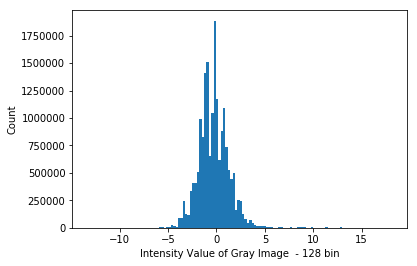

In [20]:
_ = plt.hist(E_q.ravel(), bins = 128 )
_ = plt.xlabel('Intensity Value of Gray Image  - 128 bin')
_ = plt.ylabel('Count')
plt.show()

### I tried to use 'q' part of the image and applied some filters

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'high')

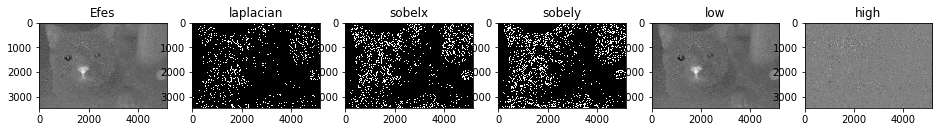

In [21]:
cv2.imwrite('E_q.jpg', E_q)
c = cv2.imread('E_q.jpg', 1)

laplacian = cv2.Laplacian(c,cv2.CV_64F)
sobelx = cv2.Sobel(c,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(c,cv2.CV_64F,0,1,ksize=5)
low8 = apply_low_pass_filter(E_q, 5)
high17 = apply_high_pass_filter(E_q, 17)

fig, axes = plt.subplots(1, 6, figsize=(16, 8))
ax = axes.ravel()

ax[0].imshow(E_q, cmap=plt.cm.gray)
ax[0].set_title("Efes")
ax[1].imshow(laplacian, cmap=plt.cm.gray)
ax[1].set_title("laplacian")
ax[2].imshow(sobelx, cmap=plt.cm.gray)
ax[2].set_title("sobelx")
ax[3].imshow(sobely, cmap=plt.cm.gray)
ax[3].set_title("sobely")
ax[4].imshow(low8, cmap=plt.cm.gray)
ax[4].set_title("low")
ax[5].imshow(high17, cmap=plt.cm.gray)
ax[5].set_title("high")


### I gave up these methods and return to google. After searching object detecting from color in google I found this code. I applied it to my image and it worked.

Text(0.5, 1.0, 'res')

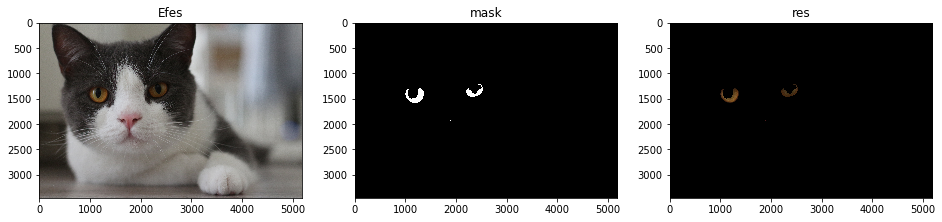

In [22]:
#https://pythonprogramming.net/color-filter-python-opencv-tutorial/
#https://handmap.github.io/colour-detection-using-rgb-boundaries/
    
lower_bound = np.array([30,150,50])
upper_bound = np.array([255,255,180])
    
mask = cv2.inRange(Efes_hsv, lower_bound, upper_bound)
res = cv2.bitwise_and(Efes,Efes, mask= mask)

fig, axes = plt.subplots(1, 3, figsize=(16, 8))
ax = axes.ravel()

ax[0].imshow(Efes, cmap=plt.cm.gray)
ax[0].set_title("Efes")
ax[1].imshow(mask, cmap=plt.cm.gray)
ax[1].set_title("mask")
ax[2].imshow(res, cmap=plt.cm.gray)
ax[2].set_title("res")

# Question2
### https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

### https://medium.com/swlh/visualizing-svm-with-python-4b4b238a7a92

# a. What’s the difference between “image processing” and “computer vision”?

Digital image processing is the study of theories, models and algorithms for the manipulation of images (usually by computer). It spans a wide variety of topics such as digitization, histogram manipulation, warping, filtering, segmentation, restoration and compression. Computer vision deals with theories and algorithms for automating the process of visual perception, and involves tasks such as noise removal, smoothing, and sharpening of edges (low-level vision); segmentation of images to isolate object regions, and description of the segmented regions (intermediate-level vision); and finally, interpretation of the scene (high-level vision). Thus, there is much overlap between these two fields.

#### Referances:
#### https://addepto.com/difference-between-computer-vision-and-image-processing/
#### https://link.springer.com/chapter/10.1007/0-387-24579-0_5    
#### https://pdfs.semanticscholar.org/7b07/4827587903f05a4a1fcdbe189b39c6661862.pdf?_ga=2.252934793.1235572499.1587010836-684717879.1587010836

# b. Scatter plot below depicts two dimensional real valued training feature vectors, X = [x1 x2], belonging to two different classes, namely, Class 1 and Class 2, obtained from a number of images for image classification purposes. The training set has 200 data points, 100 from each class.

# https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import style
style.use("ggplot")
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [24]:
l1 = []
l2 = []
with open("/Users/handesen/Desktop/data_science/Donem2/Image/final/C1__pts.txt","r") as f:
    for i in range(4):
        f.readline()
    for line in f:
        l1.append(line.split())

df1 = pd.DataFrame(l1,columns = ['x1','x2'])

with open("/Users/handesen/Desktop/data_science/Donem2/Image/final/C2__pts.txt","r") as f:
    for i in range(4):
        f.readline()
    for line in f:
        l2.append(line.split())   
df2 = pd.DataFrame(l2,columns = ['x1','x2'])
df1['x1'] = df1['x1'].astype(float)
df1['x2'] = df1['x2'].astype(float)
df2['x1'] = df2['x1'].astype(float)
df2['x2'] = df2['x2'].astype(float)


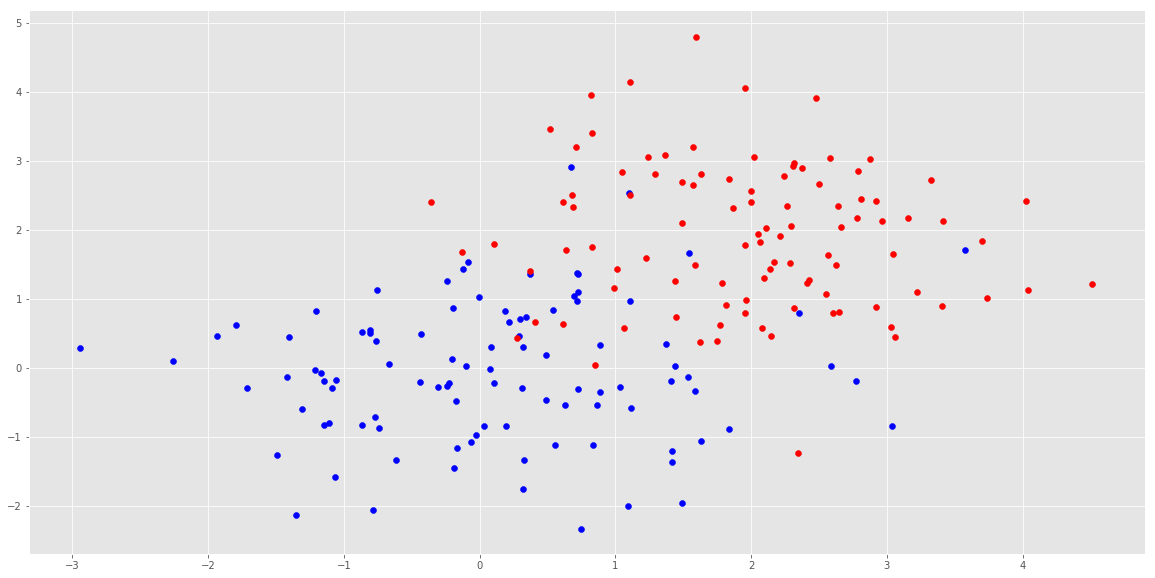

In [25]:
plt.figure(figsize=(20,10))
plt.scatter(df1['x1'],df1['x2'],color="b")
plt.scatter(df2['x1'],df2['x2'],color="r")

plt.show()

### Are these classes linearly separable, or not?

Although there are some methods to discuss easiest way to decide linearly seperable or not is to plot the data. As is seen above data cannot be linearly seperarable. If we decide to seperate the data in two classes linearly we have to accept that there will be some wrong predictions.

### Propose and implement a method to find a linear classifier to classify them. On the same scatter plot, plot the separating hyperplane you find with your method. You may use your favorite programming language for implementation. Provide your codes

In [26]:
clf = svm.SVC(kernel='linear', C = 1.0)

In [27]:
df1["Class"] = 0
df2["Class"] = 1

In [28]:
np.random.seed(42)
print(df1.columns)

Index(['x1', 'x2', 'Class'], dtype='object')


In [29]:
frames = [df1, df2]
mergedData = pd.concat(frames)

In [30]:
print(mergedData)

        x1      x2  Class
0   0.5377  0.8404      0
1   1.8339 -0.8880      0
2  -2.2588  0.1001      0
3   0.8622 -0.5445      0
4   0.3188  0.3035      0
..     ...     ...    ...
95  0.6147  2.4011      1
96  2.3105  2.9297      1
97  1.7505  0.3942      1
98  2.5037  2.6615      1
99  1.1073  4.1385      1

[200 rows x 3 columns]


In [31]:
X = mergedData.drop('Class', axis=1)
y = mergedData['Class']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [33]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [34]:
y_pred = svclassifier.predict(X_test)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[18  3]
 [ 2 17]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        21
           1       0.85      0.89      0.87        19

   micro avg       0.88      0.88      0.88        40
   macro avg       0.88      0.88      0.87        40
weighted avg       0.88      0.88      0.88        40



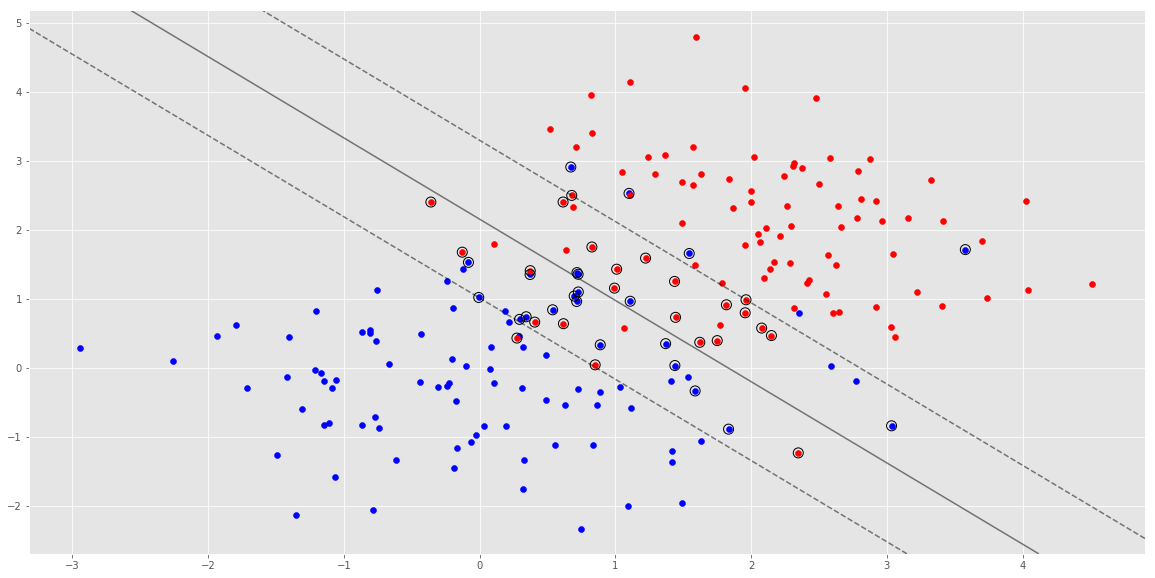

In [36]:
plt.figure(figsize=(20,10))
ax = plt.gca()

plt.scatter(df1['x1'],df1['x2'],color="b")
plt.scatter(df2['x1'],df2['x2'],color="r")

xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svclassifier.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(svclassifier.support_vectors_[:, 0], svclassifier.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

# Polynomial Kernel

When we realized that our data is not linearly seperable to get rid of this situation, we apply to the kernel trick. If we can create a new dimension, we may be able to classify it linearly. For example, if we raise the red dots a little (the z-axis) in the graphic above, we can create a linear dimension with SVM. I tried polynomial kernel on data.

In [37]:
from sklearn.svm import SVC
svcPolynomial = SVC(kernel='poly', degree=8)
svcPolynomial.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=8, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [38]:
y_pred = svcPolynomial.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 8 11]]
              precision    recall  f1-score   support

           0       0.71      0.95      0.82        21
           1       0.92      0.58      0.71        19

   micro avg       0.78      0.78      0.78        40
   macro avg       0.82      0.77      0.76        40
weighted avg       0.81      0.78      0.77        40



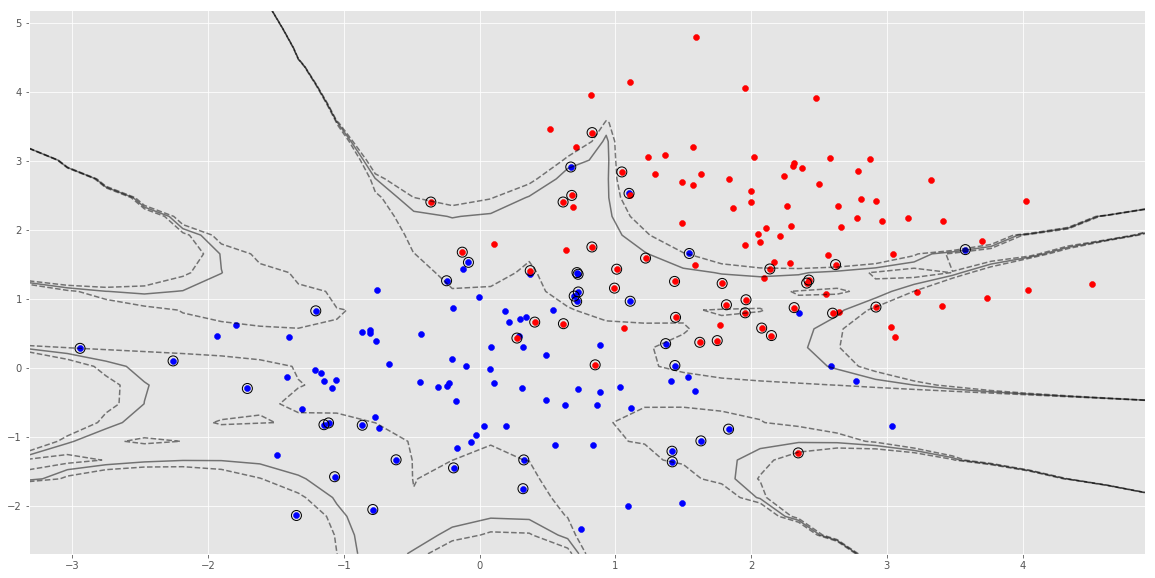

In [39]:
plt.figure(figsize=(20,10))

ax = plt.gca()

plt.scatter(df1['x1'],df1['x2'],color="b")
plt.scatter(df2['x1'],df2['x2'],color="r")

xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svcPolynomial.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svcPolynomial.support_vectors_[:, 0], svcPolynomial.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

## 3D Linear SVM (Please run the codes to see the plot)

I just try and add the x1 as a 3rd dimension, apply linear svm again and plot the hyperplane. But here data is not seperated as train-test, whole data is used.

In [40]:
import numpy as np
from sklearn.svm import SVC
import plotly
import plotly.io as pio
import plotly.graph_objects as go

mergedData['x3'] = mergedData['x1']

X = mergedData.drop('Class', axis=1)
Y = mergedData['Class']

# Fit the data with an svm
svc = SVC(kernel='linear')
svc.fit(X,Y)

z = lambda x,y: (-svc.intercept_[0]-svc.coef_[0][0]*x-svc.coef_[0][1]*y) / svc.coef_[0][2]

tmp = np.linspace(-2,2,51)
x,y = np.meshgrid(tmp,tmp)

# Plot stuff.
fig = go.FigureWidget()
fig.add_surface(x=x, y=y, z=z(x,y), colorscale='Greys', showscale=False)
fig.add_scatter3d(x=mergedData[mergedData['Class']==0]['x1'], y=mergedData[mergedData['Class']==0]['x2'], z=mergedData[mergedData['Class']==0]['x2'], mode='markers', marker={'color': 'blue'})
fig.add_scatter3d(x=mergedData[mergedData['Class']==1]['x2'], y=mergedData[mergedData['Class']==1]['x2'], z=mergedData[mergedData['Class']==1]['x2'], mode='markers', marker={'color': 'red'})
fig

FigureWidget({
    'data': [{'colorscale': [[0.0, 'rgb(255,255,255)'], [0.125,
                             'r…